# Neural Networks and Deep Learning

## Introduction

So far we've looked at linear models in the context of machine learning. But how do we get to the object detection example from the begining? We will need a system that allows for non-linear computation as well as capturing more complex relationships like the spatial relationships the pixels have that make up shapes.

That is where neural networks come in. Neural networks are a classification of ML models inspired by biological neural connections. Neural networks are made up of a series of linear and non-linear operations combined together in a network like structure to essentailly transform an input into an output.

<< go over structure of a neuron on the board >>

* Neuron: Single node in a neural network
* Weights: One weight per input applied via multiplication
* Bias: Constant applied after summing over weights and inputs
* Activation Function: Function (non-linear or linear) applied to the linear sum of our weights, inputs, and bias

$$output = f((\Sigma_{i=0}^n w_i * x_i) + b) $$


We can implement a neuron ourselves with some realtive simplistic code. 

In [1]:
import numpy as np
import numpy.typing as npt
from collections.abc import Callable
from matplotlib import pyplot as plt

class Neuron:
    def __init__(self, weights: npt.ArrayLike, bias: float, activation_function: Callable[[float], float]):
        self.weights = weights
        self.bias = bias
        self.activation_function = activation_function

    def apply(self, inputs: npt.ArrayLike) -> float:
        # Perform element-wise multiplication and sum
        sum_weights = np.sum(np.multiply(inputs, self.weights))

        # Add the bias
        total = sum_weights + self.bias

        # Apply the activiation function
        result = self.activation_function(total)

        # Now return the final result
        return result

Lets see how we can use a neuron to replicate the linear function $y = 5x + 10$

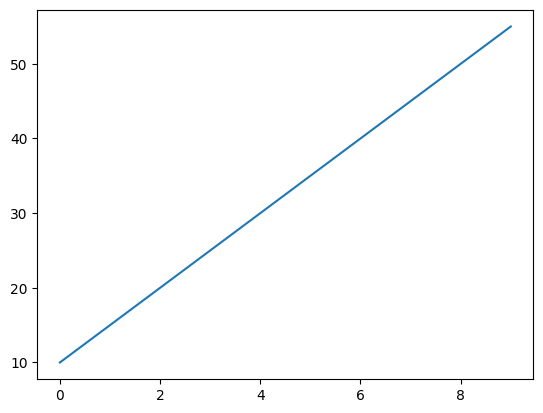

In [2]:
# Activation function which doesn't modify the value passed in
def no_action(num: float) -> float:
    return num

# One input so only one weight and a bias of 10
linear_neuron = Neuron(np.array([5]), 10, no_action)

# Now lets try plotting some values
x = np.arange(10)
y = np.vectorize(linear_neuron.apply)(x)

plt.plot(x, y)


Now lets look at an example where we have multiple input dimensions. Something like the house estimator where we will consider square footage and number of bedrooms.

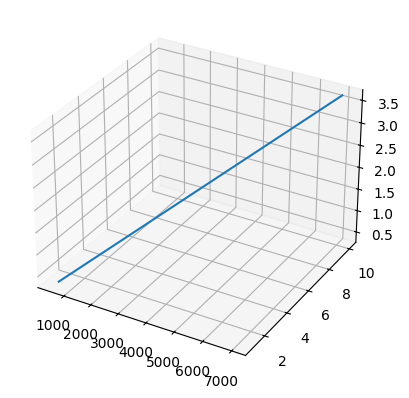

In [3]:
house_estimate = Neuron(np.array([500, 10000]), 65000, no_action)
# Now lets try plotting some values
x = np.column_stack([np.linspace(500, 7_000, 10), np.linspace(1, 10, 10)])
y = [house_estimate.apply(i) for i in x]

ax = plt.axes(projection='3d')
ax.plot3D(x[:, 0], x[:, 1], y)

So far we have been manually putting in weights and biases into our neurons. But ultimately we will get to the point of having these weights learned for us via our machine learning algorithm. Also right now we only have a single neuron, but real world applications have millions or billions of neurons combined together to produce complex relationships.

Having multiple hidden layers in a neural network together we refer to as "Deep Learning" and has become nearly the default format of machine learning in recent years.